In [1]:
#please first run file 'bmstu_transform_data'
import pandas as pd
import numpy as np
from copy import copy
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
sorted_aggregates = pd.read_csv("sorted_aggregates.csv")
sorted_aggregates = sorted_aggregates.fillna(0)

In [3]:
sorted_aggregates = sorted_aggregates.drop(columns = ['Unnamed: 0'])
sorted_aggregates

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,0,1564606800,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1567285200,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1569877200,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1572555600,1.0,3.0,3.0,3.0,2.0,1.0,0.0,3.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1575147600,1.0,3.0,4.0,4.0,2.0,1.0,0.0,4.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177958,9999,1590958800,1.0,3.0,7.0,13.0,2.0,2.0,0.0,48.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177959,9999,1593550800,1.0,3.0,6.0,13.0,2.0,2.0,0.0,49.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177960,9999,1596229200,1.0,3.0,6.0,13.0,2.0,2.0,0.0,50.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177961,9999,1598907600,1.0,3.0,6.0,13.0,2.0,2.0,0.0,51.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


In [4]:
#delete objects of type = object
names = list(sorted_aggregates.columns)
t = list(sorted_aggregates.dtypes)
for i in range(len(names)):
    if str(t[i]) == 'object':
        sorted_aggregates = sorted_aggregates.drop(columns = [names[i]])

In [5]:
# make difference between neighboring app_potreb_cnt
from copy import copy

model_data_aggregates = copy(sorted_aggregates)

for i in range(1, model_data_aggregates.shape[0]):
    client_id_now = sorted_aggregates.loc[i, 'client_id']
    client_id_prev = sorted_aggregates.loc[i - 1, 'client_id']
    if client_id_now != client_id_prev:
        model_data_aggregates.loc[i, 'app_potreb_cnt'] = min(model_data_aggregates.loc[i, 'app_potreb_cnt'], 1)
        continue
        
    app_potreb_cnt_now = sorted_aggregates.loc[i, 'app_potreb_cnt']
    app_potreb_cnt_prev = sorted_aggregates.loc[i - 1, 'app_potreb_cnt']
    
    if app_potreb_cnt_now <= app_potreb_cnt_prev:
        model_data_aggregates.loc[i, 'app_potreb_cnt'] = 0.0
    elif app_potreb_cnt_now > app_potreb_cnt_prev:
        model_data_aggregates.loc[i, 'app_potreb_cnt'] = 1.0


In [6]:
y = model_data_aggregates['app_potreb_cnt']
X = model_data_aggregates.drop(columns = 'app_potreb_cnt')

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
params = {'n_estimators' : [100],
          'max_depth': range(4, 7, 2),
          'min_samples_leaf' : range(4, 8, 2),
          'min_samples_split' : range(4, 8, 2)}
rf = RandomForestClassifier(random_state = 0, criterion='entropy')
start = time()
rf_search = GridSearchCV(rf, params, cv = 3, n_jobs = -1)
rf_search.fit(X_train, y_train)
end = time()
print("res time: ", end - start)


res time:  36.89153504371643


In [8]:
#save best clasifier
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=4, random_state=0)

In [9]:
#make predictions
y_pred = best_rf.predict(X_test)

In [10]:
#convert arrays to required format
ans = list()
y_test_list = list(y_test)
for i in range(len(y_test_list)):
    if y_test_list[i] > 0:
        ans.append(1)
    else:
        ans.append(0)
        
pred = list()
for i in range(len(y_pred)):
    if y_pred[i] == True:
        pred.append(1)
    else:
        pred.append(0)


In [11]:
best_rf = rf_search.best_estimator_
feature_importances = best_rf.feature_importances_
best_rf.score(X_test, y_test)
# feature_importances.max()

0.9770296962266721

In [12]:
from sklearn import metrics
print("precision: ", metrics.precision_score(ans, pred))
print("recall: ", metrics.recall_score(ans, pred))
print("f1_score: ", metrics.f1_score(ans, pred))
sum(pred)

precision:  1.0
recall:  0.10603048376408217
f1_score:  0.19173157579388855


160

In [13]:
X

,client_id,report_date,cnt_zp_1m,cnt_zp_3m,cnt_zp_6m,cnt_zp_12m,total_num_cards,cnt_active,cnt_cur,first_opened,...,curdel_30plus_bki,curdel_60plus_bank,curdel_60plus_bki,curdel_tech_bank,curdel_tech_bki,bank_1_29_5y_debtor,bank_30_59_5y_debtor,bank_60_89_5y_debtor,bank_90_119_5y_debtor,bank_120plus_5y_debtor
0,0,1564606800,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1567285200,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1569877200,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1572555600,1.0,3.0,3.0,3.0,2.0,1.0,0.0,3.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1575147600,1.0,3.0,4.0,4.0,2.0,1.0,0.0,4.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177958,9999,1590958800,1.0,3.0,7.0,13.0,2.0,2.0,0.0,48.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177959,9999,1593550800,1.0,3.0,6.0,13.0,2.0,2.0,0.0,49.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177960,9999,1596229200,1.0,3.0,6.0,13.0,2.0,2.0,0.0,50.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
177961,9999,1598907600,1.0,3.0,6.0,13.0,2.0,2.0,0.0,51.419,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0


In [14]:
#convert feature_importances to 'list' format
feature_importances = list(feature_importances)

In [15]:
feature_importances

[0.0006491464722386978,
 0.20253220076196535,
 0.001368364063483856,
 0.0008414984557081788,
 0.0009936752100421981,
 0.0008884461877521169,
 0.00115652746091488,
 0.0018647335401122374,
 1.4818004550139777e-05,
 0.0017281001510895647,
 0.0035957860054438868,
 0.0014935697528076965,
 0.0006315781771442058,
 0.0007150024214793363,
 0.001111455924871197,
 0.0036812523573532593,
 0.00040399339299021703,
 0.00031713334692868634,
 0.03418739327117508,
 0.0009346193003143458,
 0.0008704526142185053,
 0.0019714078868202233,
 0.17162887724715353,
 0.022275207533765412,
 0.004121856850884461,
 0.00269729144969213,
 0.0551655076558737,
 0.0,
 0.0005014011912359953,
 2.381986629789736e-06,
 7.738984271928375e-06,
 0.041221867662164166,
 0.01524603141967118,
 0.009867993238159267,
 7.777972491537655e-05,
 0.035206241070825206,
 4.948708506242443e-05,
 0.0005538338307137463,
 8.516268104030055e-05,
 3.746975056070953e-05,
 0.0002185077431297607,
 0.013789508839663941,
 0.01419257486282545,
 0.00173

In [16]:
# here we try to find optimal quantity of features

from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_imp_names = list()
for i in range(len(feature_importances)):
    feature_imp_names.append([feature_importances[i], X.columns[i]])

feature_imp_names.sort()
#print(feature_imp_names)
metrics_scores = pd.DataFrame()

for index_to_delete in range(10):
    X = X.drop(columns = feature_imp_names[index_to_delete][1])

params = {'n_estimators' : [100],
          'max_depth': range(4, 7, 2),
          'min_samples_leaf' : range(4, 8, 2),
          'min_samples_split' : range(4, 8, 2)}

for i in range(10, len(feature_imp_names) - 10):
    print(feature_imp_names[i][1])
    
    X = X.drop(columns = feature_imp_names[i][1])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    rf = RandomForestClassifier(random_state = 0, criterion='entropy')
    rf_search = GridSearchCV(rf, params, cv = 3, n_jobs = -1)
    rf_search.fit(X_train, y_train)
    best_rf = rf_search.best_estimator_
    
    y_pred = best_rf.predict(X_test)
    
    ans = list()
    y_test_list = list(y_test)
    for i in range(len(y_test_list)):
        if y_test_list[i] > 0:
            ans.append(1)
        else:
            ans.append(0)

    pred = list()
    for i in range(len(y_pred)):
        if y_pred[i] == True:
            pred.append(1)
        else:
            pred.append(0)
    
    precision = metrics.precision_score(ans, pred)
    recall = metrics.recall_score(ans, pred)
    f1_score = metrics.f1_score(ans, pred)
    metrics_dict = {'precision' : [precision], 'recall' : [recall], 'f1_score' : [f1_score]}
    string_in_metrics_scores = pd.DataFrame(metrics_dict)
    metrics_scores = metrics_scores.append(string_in_metrics_scores)
    print("precision: ", metrics.precision_score(ans, pred))
    print("recall: ", metrics.recall_score(ans, pred))
    print("f1_score: ", metrics.f1_score(ans, pred))

[[0.0, 'auto_open'], [0.0, 'bank_30_59_5y_debtor'], [0.0, 'bank_60_89_5y_debtor'], [0.0, 'bank_90_119_5y_debtor'], [0.0, 'bank_count_first_6m_60'], [0.0, 'bank_count_first_6m_90'], [0.0, 'curdel_30plus_bank'], [0.0, 'curdel_60plus_bank'], [0.0, 'curdel_60plus_bki'], [0.0, 'curdel_tech_bank'], [0.0, 'curdel_tech_bki'], [0.0, 'first_payment_default'], [0.0, 'second_payment_default'], [2.381986629789736e-06, 'micro_open'], [7.738984271928375e-06, 'other_open'], [1.0321477234827906e-05, 'curdel_30plus_bki'], [1.4603919119338678e-05, 'only_guarantees'], [1.4818004550139777e-05, 'cnt_cur'], [2.2847772318807367e-05, 'curdel_0plus_bki'], [2.562105806149236e-05, 'bank_count_first_6m_30'], [3.059944896926818e-05, 'bank_count_first_12m_90'], [3.746975056070953e-05, 'other_closed'], [3.84876383976266e-05, 'bank_count_first_12m_30'], [4.1584619771060164e-05, 'bank_count_first_12m_60'], [4.948708506242443e-05, 'auto_closed'], [4.9858087393182815e-05, 'cnt_adv_repayment_ls_50k'], [7.174018938777676e-

precision:  0.9891891891891892
recall:  0.12127236580516898
f1_score:  0.21605667060212513
cnt_zp_3m
precision:  0.9937106918238994
recall:  0.10470510271703115
f1_score:  0.18944844124700239
app_cc_cnt
precision:  0.9975903614457832
recall:  0.27435387673956263
f1_score:  0.4303534303534303
cnt_zp_12m
precision:  0.9941972920696325
recall:  0.340622929092114
f1_score:  0.5074037512339585
app_phone_home_flag
precision:  0.9611486486486487
recall:  0.3770709078860172
f1_score:  0.5416468348405521
cnt_zp_6m
precision:  0.9976525821596244
recall:  0.28164347249834326
f1_score:  0.4392764857881137
total_liab_sum_bank_adv25_agr
precision:  0.99
recall:  0.39363817097415504
f1_score:  0.5633001422475107
num_debit_cards
precision:  0.9963636363636363
recall:  0.1815772034459907
f1_score:  0.3071748878923766
total_num_cards
precision:  0.9945054945054945
recall:  0.23989396951623593
f1_score:  0.3865456486919381
total_liab_sum_bank_adv_agr
precision:  1.0
recall:  0.22796554009277667
f1_score:

In [17]:
# received DataFrame
metrics_scores

,precision,recall,f1_score
0,1.000000,0.127899,0.226792
0,1.000000,0.115971,0.207838
0,1.000000,0.083499,0.154128
0,1.000000,0.126574,0.224706
0,1.000000,0.077535,0.143911
...,...,...,...
0,0.922242,0.675944,0.780115
0,0.911864,0.713055,0.800298
0,0.895246,0.736249,0.808000
0,0.893290,0.732273,0.804807


In [18]:
# save metrics_scores as file
metrics_scores.to_csv("metrics_scores.csv")

In [19]:
metrics_scores

,precision,recall,f1_score
0,1.000000,0.127899,0.226792
0,1.000000,0.115971,0.207838
0,1.000000,0.083499,0.154128
0,1.000000,0.126574,0.224706
0,1.000000,0.077535,0.143911
...,...,...,...
0,0.922242,0.675944,0.780115
0,0.911864,0.713055,0.800298
0,0.895246,0.736249,0.808000
0,0.893290,0.732273,0.804807


In [24]:
metrics_scores = metrics_scores.reset_index().drop(columns = ['index'])
metrics_scores['del_columns'] = metrics_scores.index

In [25]:
scores_data = pd.melt(metrics_scores,value_vars = ['precision', 'recall', 'f1_score'],
                                 var_name = 'set_type', value_name = 'score', id_vars = 'del_columns')

In [26]:
scores_data

,del_columns,set_type,score
0,0,precision,1.000000
1,1,precision,1.000000
2,2,precision,1.000000
3,3,precision,1.000000
4,4,precision,1.000000
...,...,...,...
247,79,f1_score,0.780115
248,80,f1_score,0.800298
249,81,f1_score,0.808000
250,82,f1_score,0.804807


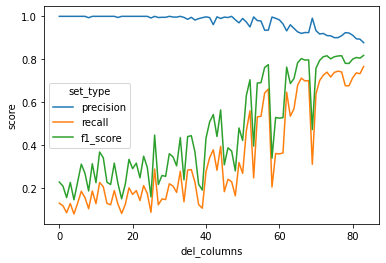

In [27]:
import seaborn as sns
graf = sns.lineplot(x = 'del_columns', y = 'score', hue = 'set_type', data = scores_data)
g = graf.get_figure()
g.savefig("myfig.png")

In [596]:
metrics_scores['del_columns'] = metrics_scores.index

In [597]:
metrics_scores

,precision,recall,f1_score,del_columns
0,0.896661,0.373757,0.527596,0


In [605]:
X

,report_date,app_addresses_equal,app_lst_request_m_term,app_fst_request_m_term,cl_open,cnt_opened_6m,avg_liab_sum_total,avg_liab_sum_total_open_agr,max_liab_sum_bank_open,total_liab_sum_bank_open_agr
0,1564606800,0.0,0.258,0.258,0.0,0.0,0.000000,0.00,0.00,0.00
1,1567285200,0.0,1.258,1.258,0.0,0.0,0.000000,0.00,0.00,0.00
2,1569877200,0.0,2.258,2.258,0.0,0.0,0.000000,0.00,0.00,0.00
3,1572555600,0.0,3.258,3.258,0.0,0.0,0.000000,0.00,0.00,0.00
4,1575147600,0.0,4.258,4.258,0.0,0.0,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
177958,1590958800,0.0,2.903,48.871,1.0,1.0,284174.413571,1392405.06,1392405.06,1392405.06
177959,1593550800,0.0,3.903,49.871,1.0,1.0,284174.413571,1392405.06,1392405.06,1392405.06
177960,1596229200,0.0,4.903,50.871,1.0,1.0,284174.413571,1392405.06,1392405.06,1392405.06
177961,1598907600,0.0,5.903,51.871,1.0,0.0,284174.413571,1392405.06,1392405.06,1392405.06


In [23]:
metrics_scores


,precision,recall,f1_score,del_columns
0,1.000000,0.127899,0.226792,0
1,1.000000,0.115971,0.207838,1
2,1.000000,0.083499,0.154128,2
3,1.000000,0.126574,0.224706,3
4,1.000000,0.077535,0.143911,4
...,...,...,...,...
79,0.922242,0.675944,0.780115,79
80,0.911864,0.713055,0.800298,80
81,0.895246,0.736249,0.808000,81
82,0.893290,0.732273,0.804807,82
